# k-fold-predictions confusion matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

df = pd.read_csv("k-fold-predictions.csv", sep=';', keep_default_na=False)
df

,fold,match,utterance,expectedIntent,predictedIntent
0,1,N,C'é un insetto gigante!,insetto,None
1,1,N,Per sicurezza ho sempre un ombrello in borsa,meteo,None
2,1,N,Fuoco!,fuoco-libero,None
3,1,N,mi son persa l'ultimo episodio della mia serie...,guarda-tv,None
4,1,Y,Non c'è più acqua in tavola,manca-acqua-tavola,manca-acqua-tavola
...,...,...,...,...,...
1623,5,N,quasi quasi guardo il telegiornale,news,None
1624,5,Y,Cucino qualcosa,cucinare,cucinare
1625,5,N,Un insetto!,insetto,None
1626,5,N,"se non inizia a piovere, dovremo bagnare le pi...",piante,None


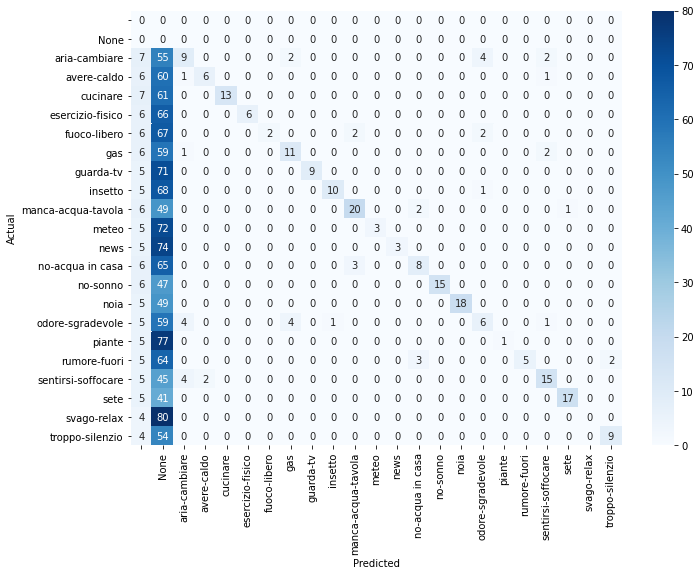

In [2]:
y_true = df["expectedIntent"]
y_pred = df["predictedIntent"]

labels = np.unique(np.concatenate((y_true, y_pred)))

cm = confusion_matrix(y_true, y_pred, labels=labels)

df_cm = pd.DataFrame(cm, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (11,8))
# sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10})# font size

## Normalized confusion matrix

In [3]:
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

<ipython-input-3-7f808820dc1c>:1: RuntimeWarning: invalid value encountered in true_divide
  norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


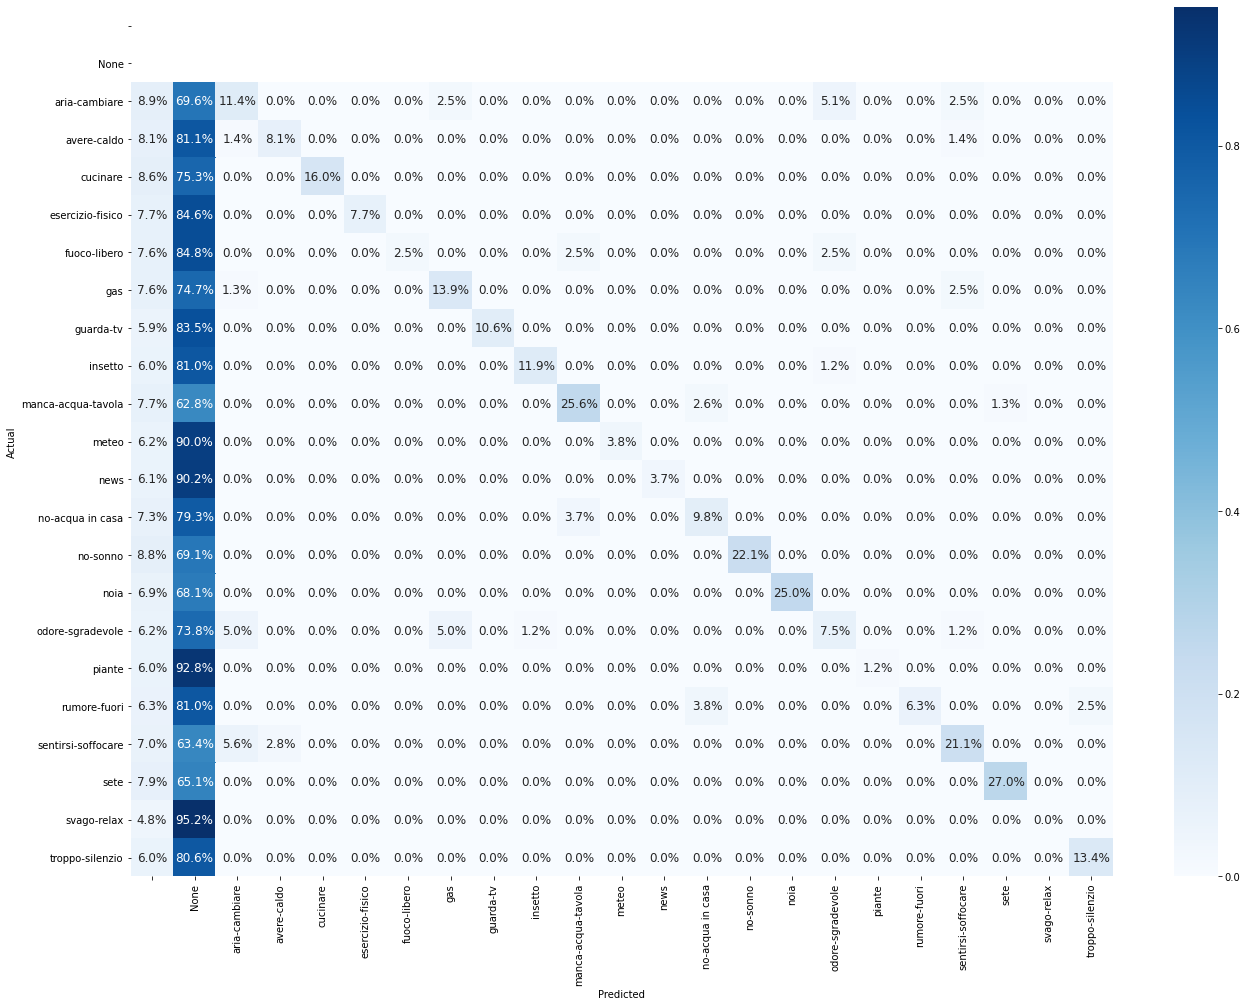

In [4]:
df_norm_cm = pd.DataFrame(norm_cm, columns=labels, index = labels)
df_norm_cm.index.name = 'Actual'
df_norm_cm.columns.name = 'Predicted'
plt.figure(figsize = (22,16))
sn.heatmap(df_norm_cm, cmap="Blues", annot=True,annot_kws={"size": 12},fmt='.1%')# font size